In [1]:
#%%
import sys
# Import functions
import recommender.models.tfidf 
import pandas as pd
from recommender.models.tfidf.tfidf_utils import TfidfRecommender
from IPython.display import display
import requests
from PIL import Image
from io import BytesIO

In [2]:
#%%
df = pd.read_csv('video_games_final.csv')
df['id'] = df.groupby(['name']).ngroup()

<bound method DataFrame.isna of                                             name  \
0        The Legend of Zelda: Breath of the Wild   
1                            Grand Theft Auto IV   
2                      Tony Hawk\'s Pro Skater 2   
3                          Red Dead Redemption 2   
4                             Grand Theft Auto V   
...                                          ...   
12339                              Tetris Splash   
12340  Bedlam: The Game by Christopher Brookmyre   
12341                            Castle of Heart   
12342                 Legends of Might and Magic   
12343                           Solar Shifter EX   

                                             description  release_date  \
0      Forget everything you know about The Legend of...        2017.0   
1      [Metacritic's 2008 Xbox 360 Game of the Year; ...        2008.0   
2      Hawk's back - with new technology, new pros an...        2000.0   
3      Developed by the creators of Grand Theft

In [3]:
# Create the recommender object
recommender = TfidfRecommender(id_col='id', tokenization_method='none')

In [4]:
# Assign columns to clean and combine
cols_to_clean = ['name','description', 'content_rating', 'platform',
       'other_platforms', 'metacritic_genres', 'metacritic_genres', 'publisher',
       'number_of_players', 'developer', 'people', 'summary',
       'game_engines', 'collection', 'storyline', 'franchises', 'expansions',
       'dlcs', 'franchise', 'external_games', 'IGDB_genres', 'IGDB_genres','platforms',
        'themes', 'player_perspectives', 'game_modes',
       'involved_companies','similar_games']
cols_to_clean
clean_col = 'cleaned_text'
df_clean = recommender.clean_dataframe(df, cols_to_clean, clean_col)

In [5]:
df_clean.head()

,name,description,release_date,average_critics_rating,number_of_critics_reviews,user_average_rating,number_of_user_reviews,content_rating,platform,other_platforms,...,IGDB_genres,platforms,similar_games,themes,player_perspectives,game_modes,involved_companies,url,cover_image,cleaned_text
0,The Legend of Zelda: Breath of the Wild,Forget everything you know about The Legend of...,2017.0,97.0,109.0,8.7,17463.0,E10+,switch,Wii U,...,"Role-playing (RPG),Adventure","Wii U,Nintendo Switch","Final Fantasy XV,The Elder Scrolls V: Skyrim,T...","Action,Fantasy,Survival,Drama,Sandbox,Open world",Third person,Single player,Nintendo,https://www.metacritic.com/game/switch/the-leg...,https://static.metacritic.com/images/products/...,the legend of zelda breath of the wild forget ...
1,Grand Theft Auto IV,[Metacritic's 2008 Xbox 360 Game of the Year; ...,2008.0,98.0,86.0,7.9,3503.0,M,xbox-360,PC,...,"Shooter,Racing,Adventure","PC (Microsoft Windows),PlayStation 3,Xbox 360","Grand Theft Auto III,Grand Theft Auto: San And...","Action,Open world",Third person,"Single player,Multiplayer","Rockstar North,Rockstar Toronto,Rockstar Games...",https://www.metacritic.com/game/xbox-360/grand...,https://static.metacritic.com/images/products/...,grand theft auto iv metacritics 2008 xbox 360 ...
2,Tony Hawk\'s Pro Skater 2,"Hawk's back - with new technology, new pros an...",2000.0,97.0,18.0,6.2,99.0,T,,iPhone/iPad,...,,,,,,,,https://www.metacritic.com/game/dreamcast/tony...,https://static.metacritic.com/images/products/...,tony hawks pro skater 2 hawks back with new t...
3,Red Dead Redemption 2,Developed by the creators of Grand Theft Auto ...,2018.0,97.0,33.0,8.0,3871.0,M,xbox-one,PC,...,"Shooter,Role-playing (RPG),Adventure","PC (Microsoft Windows),PlayStation 4,Xbox One,...","Miscreated,The Sinking City,Death Stranding,Ma...","Action,Drama,Open world","First person,Third person","Single player,Multiplayer,Co-operative","Take-Two Interactive,Rockstar Games",https://www.metacritic.com/game/xbox-one/red-d...,https://static.metacritic.com/images/products/...,red dead redemption 2 developed by the creator...
4,Grand Theft Auto V,GTA V is arguably the best entry in the series...,2014.0,97.0,14.0,7.9,1501.0,M,xbox-one,PC,...,"Shooter,Adventure","PC (Microsoft Windows),PlayStation 3,Xbox 360,...","Mafia II,L.A. Noire,Grand Theft Auto: San Andr...","Action,Comedy,Sandbox,Open world","First person,Third person","Single player,Multiplayer","Rockstar North,Rockstar Games,Take-Two Interac...",https://www.metacritic.com/game/xbox-one/grand...,https://static.metacritic.com/images/products/...,grand theft auto v gta v is arguably the best ...


In [6]:

# Tokenize text with tokenization_method specified in class instantiation
tf, vectors_tokenized = recommender.tokenize_text(df_clean, text_col=clean_col)

In [7]:
# Fit the TF-IDF vectorizer
recommender.fit(tf, vectors_tokenized)

In [8]:
# Get recommendations
top_k_recommendations = recommender.recommend_top_k_items(df_clean, k=5)

In [9]:
top_k_recommendations.loc[top_k_recommendations['id'] == '1185']['rec_id'].tolist()
df.loc[df['name'] == 'DOOM']['id']
df.loc[df['id'].isin(top_k_recommendations.loc[top_k_recommendations['id'] == '2136']['rec_id'].tolist())]

,name,description,release_date,average_critics_rating,number_of_critics_reviews,user_average_rating,number_of_user_reviews,content_rating,platform,other_platforms,...,external_games,IGDB_genres,platforms,similar_games,themes,player_perspectives,game_modes,involved_companies,url,cover_image
523,DOOM Eternal,DOOM Eternal is the direct sequel to 2016's DO...,2020.0,88.0,33.0,9.0,1799.0,M,xbox-one,PC,...,NaN,Shooter,"PC (Microsoft Windows),PlayStation 4,Xbox One,...","F.E.A.R. 2: Project Origin,Borderlands 3,Gentl...","Action,Horror",First person,"Single player,Multiplayer","Panic Button Games,Bethesda Softworks,id Software",https://www.metacritic.com/game/xbox-one/doom-...,https://static.metacritic.com/images/products/...
717,DOOM 3,id Software's terrifying battle with the force...,2004.0,87.0,83.0,7.7,1238.0,M,pc,PlayStation 3,...,"DOOM 3,Doom 3,DOOM 3,DOOM 3,DOOM 3,Doom 3,DOOM...",Shooter,"Linux,PC (Microsoft Windows),Xbox,Mac,Xbox One...","Half-Life,DOOM II: Hell on Earth,Quake 4,Rogue...","Action,Science fiction,Horror,Survival",First person,"Single player,Multiplayer","id Software,Activision,Splash Damage,Vicarious...",https://www.metacritic.com/game/pc/doom-3,https://static.metacritic.com/images/products/...
4285,DOOM II,"[Xbox Live Arcade] To save Earth, you must d...",2010.0,77.0,28.0,8.4,90.0,M,xbox-360,iPhone/iPad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metacritic.com/game/xbox-360/doom-ii,https://static.metacritic.com/images/products/...
4522,DOOM 64,"You killed the Demons once, they were all dead...",2020.0,76.0,10.0,8.1,62.0,M,switch,PC,...,"Doom 64,Doom 64,Doom 64,Doom 64,Doom 64,DOOM 6...",Shooter,"Nintendo 64,PC (Microsoft Windows),PlayStation...","Deus Ex,Quake II,DOOM II: Hell on Earth,Quake,...","Action,Science fiction,Horror",First person,Single player,"Midway Games,GameBank,id Software,Nightdive St...",https://www.metacritic.com/game/switch/doom-64,https://static.metacritic.com/images/products/...
6688,DOOM VFR,Available for PlayStation VR and VIVE platform...,2017.0,71.0,48.0,7.5,130.0,M,playstation-4,PC,...,NaN,Shooter,"Windows Mixed Reality,SteamVR,PlayStation VR","The Sinking City,Don't Knock Twice,Metro Exodu...","Action,Science fiction,Horror",Virtual Reality,Single player,"Bethesda Softworks,id Software",https://www.metacritic.com/game/playstation-4/...,https://static.metacritic.com/images/products/...


In [10]:
#get game id
id = df.loc[df['name'] == 'Dark Souls']['id'].item()
#return games that are simillar with id
games = df.loc[df['id'].isin(top_k_recommendations.loc[top_k_recommendations['id'] == str(id)]['rec_id'].tolist())]

Title: Dark Souls II
Metacritic website: https://www.metacritic.com/game/xbox-360/dark-souls-ii


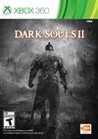

Title: Dark Souls III
Metacritic website: https://www.metacritic.com/game/pc/dark-souls-iii


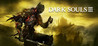

Title: Dark Souls II: Scholar of the First Sin
Metacritic website: https://www.metacritic.com/game/playstation-4/dark-souls-ii-scholar-of-the-first-sin


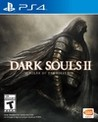

Title: Dark Souls II: Crown of the Ivory King
Metacritic website: https://www.metacritic.com/game/playstation-3/dark-souls-ii-crown-of-the-ivory-king


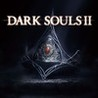

Title: Dark Souls Remastered
Metacritic website: https://www.metacritic.com/game/xbox-one/dark-souls-remastered


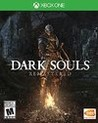

In [11]:
#print name, cover image and url to metacritic
for index,i in games.iterrows():  
       response = requests.get(i['cover_image'])
       print("Title: "+i['name'])
       print('Metacritic website: '+ i['url'])
       img = Image.open(BytesIO(response.content))
       display(img)

In [12]:
#save dataset that includes games with 5 recommendations to each
#top_k_recommendations.to_csv('recommendations.csv',encoding='utf-8',index=False)